# Important to note that these are scripts I used to generate the plots in the figure, but there is no easy way to share the raw data with others. MD trajectories are *VERY* large, Terabytes in size, so you'll need to contact the corresponding author (Erin Adams) to initiate a more formal collaboration

In [1]:
%matplotlib inline
import pyemma
import numpy as np
import matplotlib.pyplot as pl
from threading import Timer
import matplotlib as mpl
#from nglview.player import TrajectoryPlayer
import os

/home/boughter/.conda/envs/md2.7/lib/python2.7/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


In [2]:
# Let's basically take everything from the BPTI example on PyEmma Website
import pyemma.coordinates as coor

# some helper funcs
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res

def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

# Critical Residues for this analysis
338E6:

CDR1H: 25 to 31, CDR2H: 50 to 56, CDR3H: 96 to 104 

CDR3L: 306 to 314, CDR2L: 267 to 268, CDR1L: 244 to 248

In [3]:
os.chdir('sample_dcds')
topfile = 'namd/prot_only.pdb'

#trajfile = ["dyn1_10.dcd","dyn11_20.dcd","dyn21_30.dcd","dyn31_40.dcd","dyn41_50.dcd",
#            'dyn51_60.dcd','dyn61_70.dcd','dyn71_80.dcd','dyn81_90.dcd','dyn91_100.dcd',
#            'dyn101_110.dcd','dyn111_120.dcd','dyn121_130.dcd','dyn131_140.dcd','dyn141_150.dcd',
#            'dyn151_160.dcd','dyn161_170.dcd','dyn171_180.dcd','dyn181_190.dcd','dyn191_200.dcd',
#            'dyn201_210.dcd','dyn211_220.dcd','dyn221_230.dcd','dyn231_240.dcd','dyn241_250.dcd']

trajfile = ["dyn1.to.10.dcd","dyn11.to.20.dcd","dyn21.to.30.dcd","dyn31.to.40.dcd","dyn41.to.50.dcd",
            'dyn51.to.60.dcd','dyn61.to.70.dcd','dyn71.to.80.dcd','dyn81.to.90.dcd','dyn91.to.100.dcd',
            'dyn101.to.110.dcd','dyn111.to.120.dcd','dyn121.to.130.dcd','dyn131.to.140.dcd',
           'dyn141.to.150.dcd','dyn151.to.160.dcd','dyn161.to.170.dcd','dyn171.to.180.dcd',
           'dyn181.to.190.dcd','dyn191.to.200.dcd','dyn201.to.210.dcd','dyn211.to.220.dcd',
           'dyn221.to.230.dcd','dyn231.to.240.dcd','dyn241.to.250.dcd']

# Will probably want to change this significantly
feat=coor.featurizer(topfile)
# Options for this next step include "add_angles", "add_backbone_torsions" (phi/psi), "add contacts", "add_dihedrals", "add_distances_ca"

# All CDR loops for 338E6
#feat.add_backbone_torsions(selstr='residue 25 to 31 or residue 50 to 56 or residue 96 to 104 or residue 244 to 248 or residue 267 to 268 or residue 306 to 314')
# CDR3 for 338E6
#feat.add_backbone_torsions(selstr='residue 96 to 104 or residue 306 to 314')

# All CDR loops for 43G10
#feat.add_backbone_torsions(selstr='protein and (resid 26 to 34 or resid 52 to 60 or resid 96 to 106 or resid 247 to 258 or resid 276 to 278 or resid 315 to 325)')
# CDR3 for 43G10
#feat.add_backbone_torsions(selstr='protein and (resid 96 to 106 or resid 315 to 325)')

# ALL CDR loops for 2G02
feat.add_backbone_torsions(selstr='protein and (residue 26 to 33 or residue 51 to 58 or residue 96 to 112 or residue 249 to 259 or residue 277 to 279 or residue 315 to 325)')
# CDR3 only for 2G02
#feat.add_backbone_torsions(selstr='protein and (residue 96 to 112 or residue 315 to 325)')

# ALL CDR loops for 3B03
#feat.add_backbone_torsions(selstr='residue 26 to 33 or residue 51 to 60 or residue 96 to 111 or residue 248 to 253 or residue 271 to 273 or residue 309 to 319')
# And CDR3 only... 
#feat.add_backbone_torsions(selstr='residue 96 to 111 or residue 309 to 319')

# ALL CDR loops for 4c05
#feat.add_backbone_torsions(selstr='residue 23 to 31 or residue 65 to 67 or residue 86 to 96 or residue 233 to 239 or residue 259 to 263 or residue 304 to 320')
# And CDR3 only... 
#feat.add_backbone_torsions(selstr='residue 86 to 96 or residue 304 to 320')

#feat.describe()[:20]

/home/boughter/.conda/envs/md2.7/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/boughter/.conda/envs/md2.7/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


In [4]:
inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimensions = ',inp.dimension())

Obtaining file info: 100% (25/25) [################################] eta 00:01 /('trajectory length = ', 2000)
('number of dimensions = ', 132)


In [5]:
raw_dat=np.array(inp.get_output())

getting output of FeatureReader: 100% (500/500) [##################] eta 00:01 /

In [6]:
# lag should be 100 for CPU sims
lag=100
# lag should be 50 for GPU sims
#lag=50
dimens=4
tica_obj = coor.tica(inp, lag=lag, dim=dimens, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()
print('Projected data shape = ', Y[0].shape)

getting output of TICA: 100% (500/500) [###########################] eta 00:01 |('Projected data shape = ', (2000, 4))


In [7]:
print(np.shape(Y))

(25, 2000, 4)


In [8]:
# This is hardcoded, which is not great...
tica_dat=np.array([Y[i] for i in np.arange(len(Y))]).reshape(2000*len(Y),dimens)

In [9]:
font = {'family' : 'dejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}
COLOR = 'black'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('font', **font)

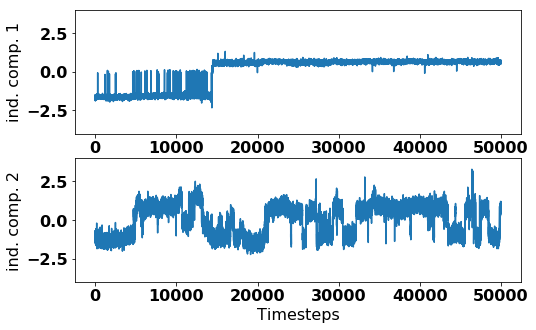

In [10]:
fig, ax = pl.subplots(2, 1,squeeze=False,figsize=(8,5))
ax[0,0].plot(tica_dat[:,0])
ax[0,0].set_ylabel('ind. comp. 1')
ax[0,0].set_ylim([-4,4])
ax[1,0].plot(tica_dat[:,1])
ax[1,0].set_ylabel('ind. comp. 2')
ax[1,0].set_ylim([-4,4])
pl.xlabel('Timesteps')
fig.savefig('2g02_1D_tICA.pdf',format='pdf')

In [11]:
# The mean SHOULD be 0 and the variance SHOULD be 1... Any deviation from this suggests a problem...
print('Mean values: ', np.mean(tica_dat, axis=0))
print('Variances:   ', np.var(tica_dat, axis=0))

('Mean values: ', array([-0.00155597,  0.0020565 ,  0.00405728, -0.00084024], dtype=float32))
('Variances:   ', array([1.0017163, 0.995771 , 1.0063026, 0.995844 ], dtype=float32))


In [12]:
# An underestimate of the relevant timescales inherent to this system. multiply by the sampling interval (20ps if there is no subsampling of frames)
# This isn't quite right, because the tica_obj is not yet in the form of a concatenated trajectory....
# In other words, I think it only spits out the lagtimes for the first loaded frame
print(-lag/np.log(tica_obj.eigenvalues[:5]))

[6980.01673483  644.61571113  529.25244896  253.27456538  204.97359234]


/home/boughter/.conda/envs/md2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Text(0.5,0,'IC 1')

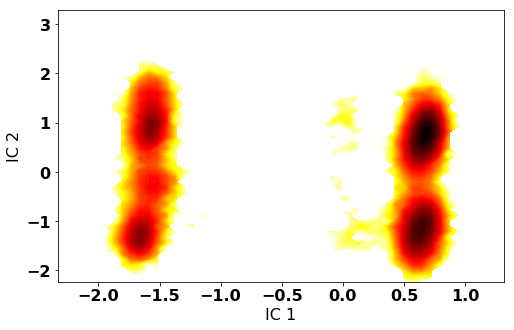

In [13]:
# histogram data
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(8,5))
z,x,y = np.histogram2d(tica_dat[:,0],tica_dat[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
pl.contourf(F.T, 50, cmap=pl.cm.hot, extent=extent)
pl.ylabel('IC 2')
pl.xlabel('IC 1')

In [14]:
# k = number of cluster centers, can probably pick a longer stride if slow...
cl = coor.cluster_kmeans(data=tica_dat, k=5, stride=1,max_iter=5000)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

kmeans iterations:   0% (   9/5000) [                              ] eta 00:52 |11-01-21 13:33:35 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 10 steps.
getting output of KmeansClustering: 100% (10/10) [#################] eta 00:01 /

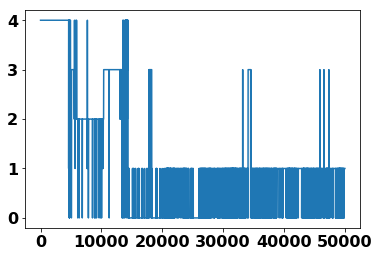

In [15]:
# This shows the time trace of cluster visits...
pl.plot(cl.dtrajs[0])

In [16]:
blocks=len(trajfile)
slices=inp.trajectory_length(0)
states=[0,1,2,3,4]


# Now let's split this up in to 50 evenly spaced (through sample space, not time)
# examples of these frames:
divider=np.zeros((len(states))) # Divider determines the number of states in each cluster (divided by 50)
for i in np.arange(len(states)):
    divider[i]=len(np.transpose(cl.index_clusters[i])[1])/50

mat_lens=np.zeros(len(divider))
for i in np.arange(len(divider)):
    mat_lens[i]=len(np.transpose(cl.index_clusters[i])[1][::int(divider[i])])

saving_matrix=np.zeros((blocks,int(max(mat_lens)),len(states)))

for i in states:
    blocky=0
    frame=np.zeros((blocks))
    for j in np.transpose(cl.index_clusters[i])[1][::int(divider[i])]:
        blocky=0
        while j > (blocky+1)*slices:
            blocky=blocky+1
        saving_matrix[blocky,int(frame[blocky]),i]=j-blocky*slices
        frame[blocky]=frame[blocky]+1

In [17]:
for i in states:
    for j in np.arange(blocks):
        dat=saving_matrix[j,:,i]
        filename=trajfile[j]+'.txt'
        with open('state'+str(i)+'.'+filename, 'w') as filehandle:
            for listitem in dat:
                if listitem != 0:
                    filehandle.write('%s ' % int(listitem))

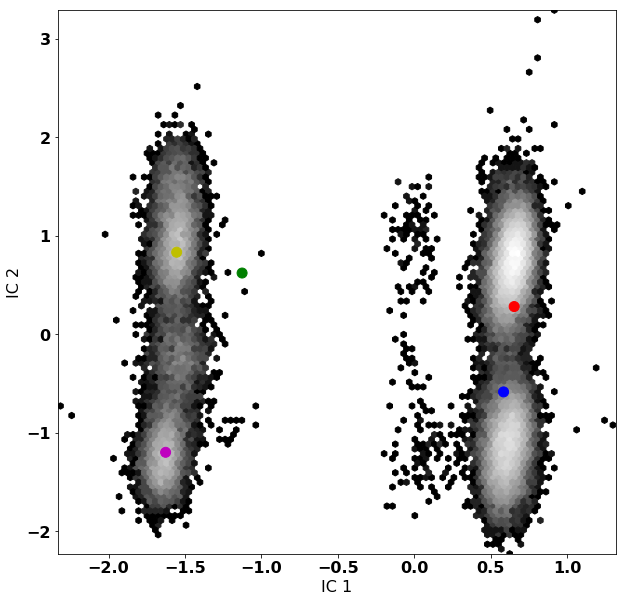

In [18]:
# This one is stolen from Kevin's script... I think I like it a little more because it gives a better idea of sampling
fig=pl.figure(figsize=(10,10))
pl.hexbin(tica_dat[:,0], tica_dat[:,1], bins='log', mincnt=1, cmap='gist_gray')
pl.ylabel('IC 2')
pl.xlabel('IC 1')
pl.scatter(cc_x,cc_y,color='brygm',s=100)
fig.savefig('2g02_clusters.pdf',format='pdf')
# Honestly pretty stoked that I got this to work (help from the MSMbuilder page)

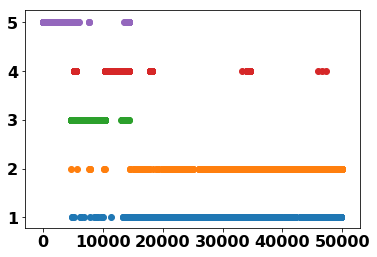

In [19]:
# Find out when you visit each kcenter microstate through time
state1 = [i for i, s in enumerate(dtrajs[0]) if s==0]
state2 = [i for i, s in enumerate(dtrajs[0]) if s==1]
state3 = [i for i, s in enumerate(dtrajs[0]) if s==2]
state4 = [i for i, s in enumerate(dtrajs[0]) if s==3]
state5 = [i for i, s in enumerate(dtrajs[0]) if s==4]

pl.scatter(state1,1*np.ones(len(state1)))
pl.scatter(state2,2*np.ones(len(state2)))
pl.scatter(state3,3*np.ones(len(state3)))
pl.scatter(state4,4*np.ones(len(state4)))
pl.scatter(state5,5*np.ones(len(state5)))
fig.savefig('2g02_stateBounces.pdf',format='pdf')

# Do Some RMSD Measurements

# Doing Some MSM Stuff? I'm unsure how useful this will be, but might as well put it down

In [20]:
import pyemma.msm as msm
import pyemma.plots as mplt

estimating MaximumLikelihoodMSM: 100% (8/8) [######################] eta 00:01 \

(0.1, 100000)

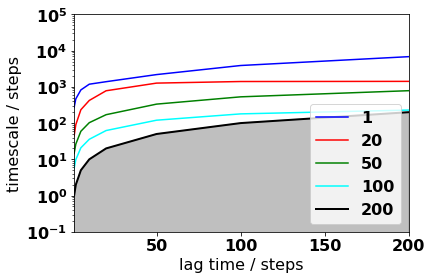

In [31]:
lags = [1,2,5,10,20,50,100,200]
its = msm.its(dtrajs, lags=lags)
mplt.plot_implied_timescales(its)
pl.legend(['1','20','50','100','200'])
pl.ylim([0.1,100000])

In [ ]:
its = msm.its(dtrajs, lags=lags, errors='bayes')
mplt.plot_implied_timescales(its)

('fraction of states used = ', 1.0)
('fraction of counts used = ', 1.0)


(0, 5)

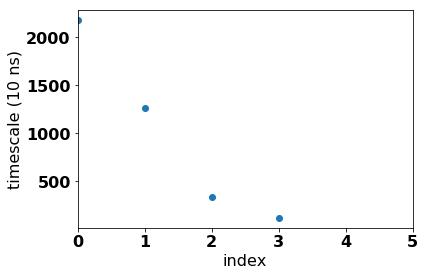

In [35]:
M = msm.estimate_markov_model(dtrajs, 50)
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

pl.plot(M.timescales(),linewidth=0,marker='o')
pl.xlabel('index'); pl.ylabel('timescale (10 ns)')
pl.xlim([0,5])

In [59]:
import pandas
ab='3b03'
os.chdir('CDR_jupyter/'+ab+'_data/contact_data')

a1_10=pandas.read_csv(ab+'_1to10.txt')
a11_20=pandas.read_csv(ab+'_11to20.txt')
a21_30=pandas.read_csv(ab+'_21to30.txt')
a31_40=pandas.read_csv(ab+'_31to40.txt')
a41_50=pandas.read_csv(ab+'_41to50.txt')
#a51_60=pandas.read_csv(ab+'_51to60.txt')
#a61_70=pandas.read_csv(ab+'_61to70.txt')
#a71_80=pandas.read_csv(ab+'_71to80.txt')
#a81_90=pandas.read_csv(ab+'_81to90.txt')
#a91_100=pandas.read_csv(ab+'_91to100.txt')
#a101_110=pandas.read_csv(ab+'_101to110.txt')
#a111_120=pandas.read_csv(ab+'_111to120.txt')
#a121_130=pandas.read_csv(ab+'_121to130.txt')

all_tacts=pandas.concat([a1_10,a11_20,a21_30,a31_40,a41_50])#,a51_60,a61_70,a71_80,a81_90,a91_100,a101_110,a111_120,a121_130])
np.shape(all_tacts)

(108377, 5)

In [60]:
frame_tot=2000*5.0 #13.0 for full datasets..
# So this next line actually gives us exactly what we want in terms of a "count"
counted_tacts=all_tacts.groupby(['Res1','Res2']).size().reset_index().rename(columns={0:'count'})
plot_counts=counted_tacts.values

In [61]:
font = {'family' : 'dejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}
COLOR = 'black'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('font', **font)

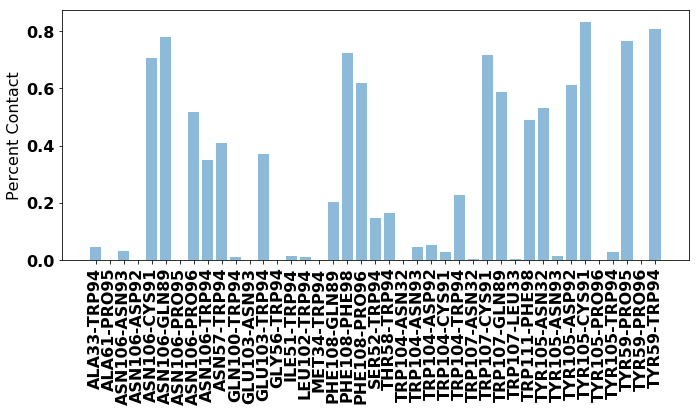

In [62]:
# Plot the histograms of contacts
import matplotlib.pyplot as mpl
fig, ax = mpl.subplots(1, 1,squeeze=False,figsize=(10,6))
pos=np.arange(len(plot_counts[:,2]))
mpl.bar(pos, plot_counts[:,2]/frame_tot, align='center', alpha=0.5)
labels=plot_counts[:,0]+'-'+plot_counts[:,1]
mpl.xticks(pos, labels,rotation='vertical')
mpl.ylabel('Percent Contact')
#mpl.ylim([0,1])
mpl.tight_layout()

fig.savefig('3b03_contacts_200ns.pdf',format='pdf')